In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [5]:
iris_data=pd.read_csv("Iris.csv")
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
iris_data['Species']=label_encoder.fit_transform(iris_data['Species'])
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [7]:
#Converting input to numpy array
np_iris=iris_data.to_numpy()
print(np_iris.shape)

(150, 6)


In [8]:
X_data=np_iris[:,0:4]
Y_data=np_iris[:,4]
print("\n features before Scaling : \n------------")
print(X_data[:5,:])
print("\ntarget before one-hot encoding:  \n--------------")
print(Y_data[:5])


 features before Scaling : 
------------
[[1.  5.1 3.5 1.4]
 [2.  4.9 3.  1.4]
 [3.  4.7 3.2 1.3]
 [4.  4.6 3.1 1.5]
 [5.  5.  3.6 1.4]]

target before one-hot encoding:  
--------------
[0.2 0.2 0.2 0.2 0.2]


In [10]:
#create a standard scaler object that if fit on the input data
scaler=StandardScaler().fit(X_data)
#scaling the numeric feature variable
X_data=scaler.transform(X_data)
#convert target variable as a one-hot encoded array
Y_data=tf.keras.utils.to_categorical(Y_data,3)
print("\n features after Scaling : \n------------")
print(X_data[:5,:])
print("\ntarget after one-hot encoding:  \n--------------")
print(Y_data[:5])


 features after Scaling : 
------------
[[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]]

target after one-hot encoding:  
--------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
#splitting
X_train, X_test, Y_train, Y_test=train_test_split(X_data, Y_data, test_size=0.10, random_state=1)
print("\n Train test Dimensions:  \n-------------")
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


 Train test Dimensions:  
-------------
(135, 4) (15, 4) (135, 3) (15, 3)


In [16]:
from tensorflow import keras
#number of classes
NB_CLASSES=3
#Sequential model
model=tf.keras.models.Sequential()
#first hidden layer
model.add(keras.layers.Dense(128,input_shape=(4,),name="Hidden-Layer-1",activation="relu"))#in the order of nodes,input,name and activation

#2nd hidden layer
model.add(keras.layers.Dense(128,name="Hidden-Layer-2",activation="relu"))

#output layer
model.add(keras.layers.Dense(NB_CLASSES,name="Output-Layer",activation="softmax"))


#compiling the model with loss and metrics
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#printing the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

Training and evaluating the model

In [18]:
#using verbose to see the process
VERBOSE=1
#Setting hyperparameters for training
#Set batch size
BATCH_SIZE=16
#setting epochs
EPOCHS=20
#Setting validation split, 20% of the training data is used for validation
VALIDATION_SPLIT=0.2

print("\nTraining Progress:  \n-------------------")

#now fitting the model is done--- including training, forward propagation, backward propagation, loss computation and gradient decent
history=model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)


Training Progress:  
-------------------
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4091 - loss: 1.0634 - val_accuracy: 0.8889 - val_loss: 0.8393
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8748 - loss: 0.7660 - val_accuracy: 0.8889 - val_loss: 0.6434
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9103 - loss: 0.5857 - val_accuracy: 0.8889 - val_loss: 0.4999
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8939 - loss: 0.4891 - val_accuracy: 0.8889 - val_loss: 0.4150
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8789 - loss: 0.4035 - val_accuracy: 0.8889 - val_loss: 0.3466
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8521 - loss: 0.3774 - val_accuracy: 0.8889 - val_loss: 0.3117
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8852 - loss: 0.3193 - val_accuracy: 0.8889 - val_loss: 0.2783
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8566 - loss: 0.3525 - val


Accuracy During Training: 
------------


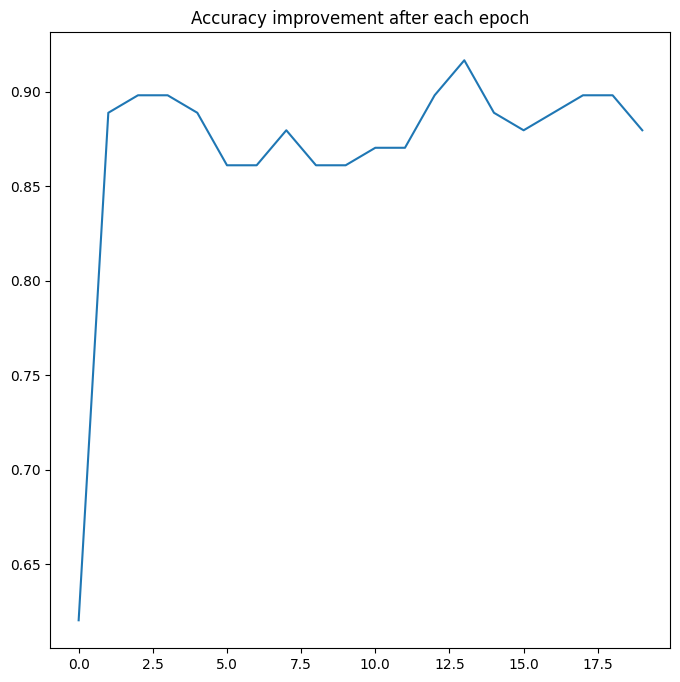

In [24]:
print("\nAccuracy During Training: \n------------")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,8))
plt.title("Accuracy improvement after each epoch")
plt.show()

In [25]:
print("\nEvaluate against test dataset:  \n---------------------------")
model.evaluate(X_test, Y_test)


Evaluate against test dataset:  
---------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0766


[0.07657624781131744, 1.0]

In [29]:
#Saving the model
model.save("Iris_save.keras")
#loading
loaded_model=keras.models.load_model("Iris_save.keras")
#printing
loaded_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,619 (205.55 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,080 (137.04 KB)

Predicting with Deep learning model

In [34]:
#raw prediction data
prediction_input=[[2.6,12,2.5,6.1]]

#scaling the prediction data with the same scaling object
scaled_input=scaler.transform(prediction_input)

#getting the raw prediction probabilities
raw_prediction=loaded_model.predict(scaled_input)
print("Raw Predition Output (Probabilities):",raw_prediction)

#Find prediction
prediction=np.argmax(raw_prediction)
print("Prediction is",label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Raw Predition Output (Probabilities): [[2.7945154e-19 1.0926456e-05 9.9998903e-01]]
Prediction is ['Iris-virginica']
